In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import time, os
import random
import numpy as np
%matplotlib inline

In [26]:
data_dir = os.path.join(os.getcwd(), "tuercas")
os.listdir(data_dir)

['con_polea.txt',
 'polea_peso_15g.txt',
 'polea_peso_22g.txt',
 'polea_peso_30g.txt',
 'polea_peso_30gmueve.txt',
 'polea_peso_7g.txt',
 'polea_peso_9g.txt',
 'sin_polea.txt']

con_polea.txt
(1024, 64) (1024,)
polea_peso_9g.txt
(1024, 64) (1024,)
polea_peso_15g.txt
(1024, 64) (1024,)
polea_peso_30g.txt
(1024, 64) (1024,)


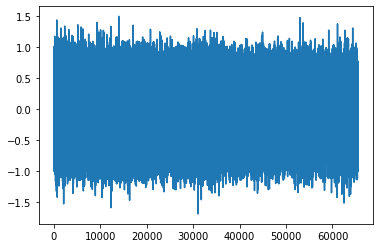

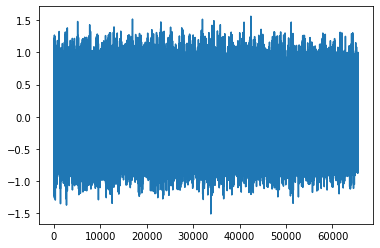

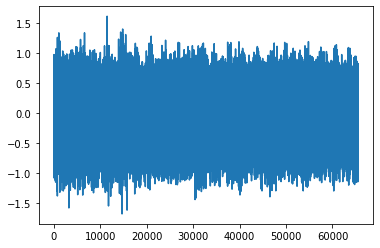

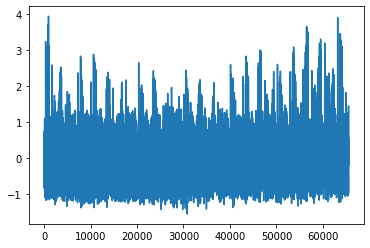

In [36]:
import json

final_data = []
final_labels = []
DATA_LEN = 64

files = ["con_polea.txt", "polea_peso_9g.txt", "polea_peso_15g.txt", "polea_peso_30g.txt"]

for file in files:
    data_file = os.path.join(data_dir, file)
    print(file)
    with open(data_file, 'r') as f:
        data = json.loads(f.read())
    if file == "normal.txt":
        data = [element for element in data]
    if file == "frontal_imbalance.txt":
        data = [element for element in data]
    if file == "latera_imbalance.txt":
        data = [element for element in data]
    if file == "load_imbalance.txt":
        data = [element for element in data]
    
    plt.figure()
    plt.plot(data)
    data = np.array(data)
    data = data.reshape(int(len(data)/DATA_LEN), DATA_LEN)
    
    label = [file.replace(".txt","") for x in range(len(data))]
    labels = np.array(label)
    print(data.shape, labels.shape)
    
    final_data.append(data)
    final_labels.append(labels)

In [37]:
final_data = np.array(final_data)
final_labels = np.array(final_labels)
final_data.shape, final_labels.shape

((4, 1024, 64), (4, 1024))

In [38]:
final_data = final_data.reshape(-1, final_data.shape[-1])
final_labels = final_labels.reshape(-1)

In [39]:
final_data.shape, final_labels.shape

((4096, 64), (4096,))

In [40]:
np.savez("measurements_tuerca_{}_sin22g.npz".format(DATA_LEN), data=final_data, labels=final_labels)

In [35]:
final_data.shape

(5120, 64)